# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
human = pd.read_csv('../../abcd1/data/DESeq2/Human_NT_vs_ABCD1_DESeq2_results.tsv', sep='\t', header=None, names=['GeneID','Base mean','log2(FC)','StdErr','Wald-Stats','P-value','P-adj'])
human = human.dropna(how='any')[:150].set_index('GeneID').rename_axis(None)
human['log2(FC)'] = human['log2(FC)'] * -1
human['prize'] = human['log2(FC)'].abs()

human.rename(columns={'Base mean': 'Base_Mean', 'log2(FC)': 'log2FC', 'StdErr': 'StdErr', 'Wald-Stats': 'Wald_Stats', 'P-value': 'P_value', 'P-adj': 'P_adj'}, inplace=True)

human[['prize','Base_Mean','log2FC','StdErr','Wald_Stats','P_value','P_adj']].to_csv('/Users/alex/Documents/abcd1/human_deseq_prizes_100.tsv', sep='\t')


In [3]:
# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
from graph import *

# import OmicsIntegrator as oi

In [4]:
interactome_file = "/Users/alex/Documents/gslr/experiments/algorithms/pcsf/inbiomap_temp.tsv"
prize_file = "/Users/alex/Documents/abcd1/human_deseq_prizes_100.tsv"
graph = Graph(interactome_file, {'g':10000}, skip_checks=True)

In [5]:
graph.prepare_prizes(prize_file)

11:26:03 - Graph: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
11:26:03 - Graph: INFO - []
11:26:03 - Graph: INFO - Members of the prize file not present in the interactome:
11:26:03 - Graph: INFO - ['ATP6V0E1', 'CXorf36', 'GLT25D1', 'NORAD']


In [6]:
vertex_indices, edge_indices = graph.pcsf()

In [7]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

/Users/alex/Documents/OmicsIntegrator2/src/graph.py:721: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  nx.set_node_attributes(nxgraph, subcellular.loc[list(nxgraph.nodes())].dropna(how='all').to_dict(orient='index'))


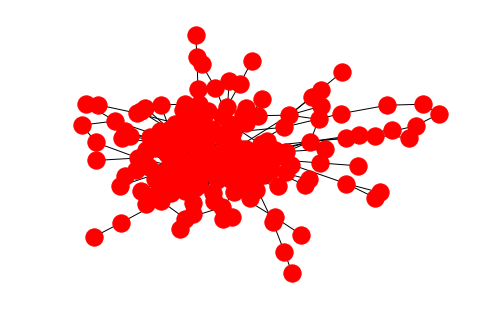

In [8]:
nx.draw_spring(augmented_forest)

In [9]:
graph.pcsf_objective_value(forest)

201.77532290228331

In [10]:
get_networkx_graph_as_dataframe_of_nodes(augmented_forest)

,Base_Mean,P_adj,P_value,StdErr,Wald_Stats,betweenness,degree,location,log2FC,louvainClusters,prize,terminal,type
ACTB,NaN,NaN,NaN,NaN,NaN,0.0907173,332,nucleus,NaN,7,0,False,protein
ACTG1,32205.2,1.42189e-191,5.90926e-194,0.0358763,29.7088,0.0516289,154,extracellular,-1.06584,0,1.06584,True,protein
ACTR2,NaN,NaN,NaN,NaN,NaN,0.0371777,95,plasma_membrane,NaN,2,0,False,protein
ADAM23,1237.69,0,0,0.0823303,-39.028,0,2,plasma_membrane,3.21319,0,3.21319,True,protein
ADD3,2596.83,3.43013e-293,5.41704e-296,0.062866,-36.7708,0,25,nucleus,2.31163,1,2.31163,True,protein
AMOTL2,3096.33,8.1149e-294,1.24782e-296,0.0530887,36.8106,0,77,cytoplasm,-1.95423,2,1.95423,True,protein
ANKRD1,15603.6,0,0,0.0403247,46.4681,0,19,nucleus,-1.87382,0,1.87382,True,protein
AP2A1,NaN,NaN,NaN,NaN,NaN,0.0303538,93,golgi,NaN,2,0,False,protein
AP2M1,5152.01,0,0,0.0513383,-52.3324,0.02498,205,vesicle,2.68666,2,2.68666,True,protein
APLP2,25646,7.86473e-221,2.45139e-223,0.0416856,-31.9027,0,31,vesicle,1.32988,2,1.32988,True,protein


In [11]:
output_networkx_graph_as_interactive_html(augmented_forest, '/Users/alex/Desktop/')

'/Users/alex/Documents/OmicsIntegrator2/example/graph.html'